Dieser Abschitt dient nur dazu, noch nötige Plots der beiden Datensätze zu erzeugen, für die in den anderen Notebooks keine Speicherkapaziztät mehr gewesen ist. Die hier erzuegten Grafiken entsprechen Abbildung 4 in der Arbeit.

In [1]:
#Wir implementieren zunächst alle nötigen Bibliotheken
import numpy as np

from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons, make_blobs
from sklearn.neighbors import kneighbors_graph
from sklearn.neighbors import radius_neighbors_graph
from sklearn.metrics.pairwise import euclidean_distances
import networkx as nx
import warnings

import matplotlib.pyplot as plt
import matplotlib



In [2]:
#Datensatz_1: Zwei Monde und ein Blob
Monde, y_1 = make_moons(150, noise=0.1, shuffle = False, random_state = 2) #erzeuge Monde
Blobs,y_2 = make_blobs(n_samples=100, centers = [[-1,-1]], cluster_std = 0.25, shuffle = False, random_state = 87) #erzeuge Blob
 


#Füge Mode und Blob zu einem Datensatz zusammen
Daten_1 = np.concatenate((Monde, Blobs), 0) 
Zugehörigkeit_1 =  np.concatenate((y_1, y_2+2), 0)

#Anzahl Datenpunkte 
n_1 = Daten_1.shape[0]



In [3]:
#Anzahl Datenpunkte
n_2 = 500
#Blobs
Daten_2, Zugehörigkeit_2 = make_blobs(n_samples=n_2,  random_state=170, 
                                              centers= [[-8.95, -5.46], [-4.59, 0.09], [ 1.94,  0.51]], 
                                              shuffle= False)

#Transformationsmatrix
transformation = [[0.5, -0.5], [-0.4, 0.7]]

#print(transformation)
#transformierte Daten
Daten_2 = np.dot(Daten_2, transformation)



167

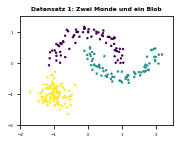

In [4]:
from matplotlib.ticker import MaxNLocator #brauchen wir, damit die Achsenbeschriftung nur natürliche Zahlen sind


#Plotte ersten Datensatz
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,8))
ax.set_title('Datensatz 1: Zwei Monde und ein Blob', fontsize=6, fontweight='demi')
ax.scatter(Daten_1[:, 0], Daten_1[:, 1], s= 2, c =Zugehörigkeit_1 )
ax.set_axis_on()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, labelsize = 4)
ax.set_xlim([-2, 2.5])
ax.set_ylim([-2, 1.5])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))


fig.set_size_inches(2.6, 2.1)
fig.tight_layout()

plt.savefig('Datensaetze_1.pdf')

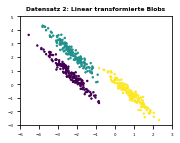

In [5]:
#Plotte ersten Datensatz
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,8))
ax.set_title('Datensatz 2: Linear transformierte Blobs', fontsize=6, fontweight='demi')
ax.scatter(Daten_2[:, 0], Daten_2[:, 1], s= 2, c =Zugehörigkeit_2 )
ax.set_axis_on()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, labelsize = 4)
ax.set_xlim([-5.0, 3.0])
ax.set_ylim([-3.0, 5.0])
ax.ticklabel_format( axis='both', style='scientific')



fig.set_size_inches(2.6, 2.1)
fig.tight_layout()

plt.savefig('Datensaetze_2.pdf')